# Exploratory Data Analysis
Explore the Kaggle Housing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the training data
df = pd.read_csv('./data/train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Data shape
df.shape

(1460, 80)

In [4]:
# List all columns with the data types, null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [5]:
# Number of columns that are numeric
df.select_dtypes(include='number').shape

(1460, 37)

In [6]:
# Number of columns that are categorical. Assuming that all object columns are categorical, which seems to be the case
# based on the description of the data
df.select_dtypes(include='object').shape

(1460, 43)

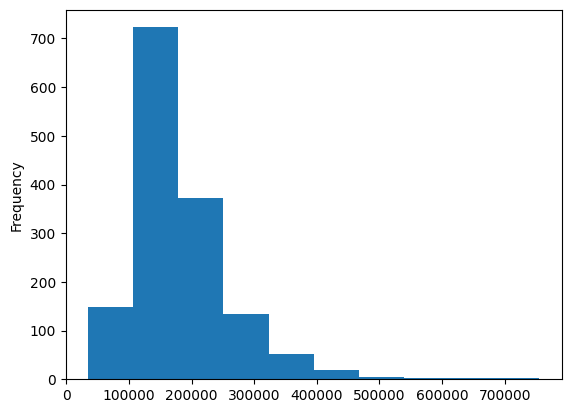

In [7]:
# Plot the distributions of the numeric columns
df['SalePrice'].plot(kind="hist")
plt.show()

In [8]:
# How are columns correlated
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df.select_dtypes(include='number').dropna().corr(method=histogram_intersection)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,46047.0,62940.0,6964.0,6234.0,62940.0,62940.0,24556.0,40084.0,5861.0,...,29008.0,25700.0,7812.0,830.0,4922.0,355.0,1395.0,7107.0,62940.0,62940.0
LotFrontage,46047.0,1.0,79216.0,6964.0,6234.0,79216.0,79216.0,32879.0,52052.0,8875.0,...,37488.0,34593.0,10328.0,1426.0,6843.0,881.0,2432.0,7107.0,79216.0,79216.0
LotArea,62940.0,79216.0,1.0,6964.0,6234.0,2206005.0,2220980.0,121615.0,491446.0,49985.0,...,103816.0,51712.0,24488.0,3754.0,18049.0,3290.0,26264.0,7107.0,2245189.0,11347834.0
OverallQual,6964.0,6964.0,6964.0,1.0,5695.0,6964.0,6964.0,3176.0,4673.0,704.0,...,3593.0,4261.0,872.0,114.0,604.0,47.0,183.0,5758.0,6964.0,6964.0
OverallCond,6234.0,6234.0,6234.0,5695.0,1.0,6234.0,6234.0,2435.0,4199.0,719.0,...,2972.0,3395.0,920.0,102.0,563.0,31.0,209.0,5341.0,6234.0,6234.0
YearBuilt,62940.0,79216.0,2206005.0,6964.0,6234.0,1.0,2210909.0,121615.0,487278.0,49985.0,...,103816.0,51712.0,24488.0,3754.0,18049.0,3290.0,25583.0,7107.0,2210909.0,2210909.0
YearRemodAdd,62940.0,79216.0,2220980.0,6964.0,6234.0,2210909.0,1.0,121615.0,487280.0,49985.0,...,103816.0,51712.0,24488.0,3754.0,18049.0,3290.0,25748.0,7107.0,2225950.0,2225951.0
MasVnrArea,24556.0,32879.0,121615.0,3176.0,2435.0,121615.0,121615.0,1.0,82651.0,6087.0,...,43176.0,23847.0,3567.0,1791.0,6858.0,763.0,964.0,2960.0,121615.0,121615.0
BsmtFinSF1,40084.0,52052.0,491446.0,4673.0,4199.0,487278.0,487280.0,82651.0,1.0,28511.0,...,69226.0,32672.0,13311.0,2815.0,13202.0,3236.0,11719.0,4736.0,487290.0,491446.0
BsmtFinSF2,5861.0,8875.0,49985.0,704.0,719.0,49985.0,49985.0,6087.0,28511.0,1.0,...,10873.0,4389.0,3591.0,28.0,2668.0,1030.0,1263.0,726.0,49985.0,49985.0


<Axes: >

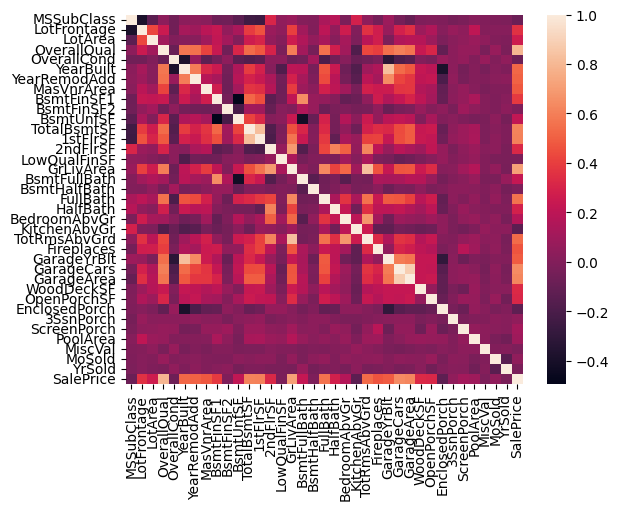

In [9]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Axes: >

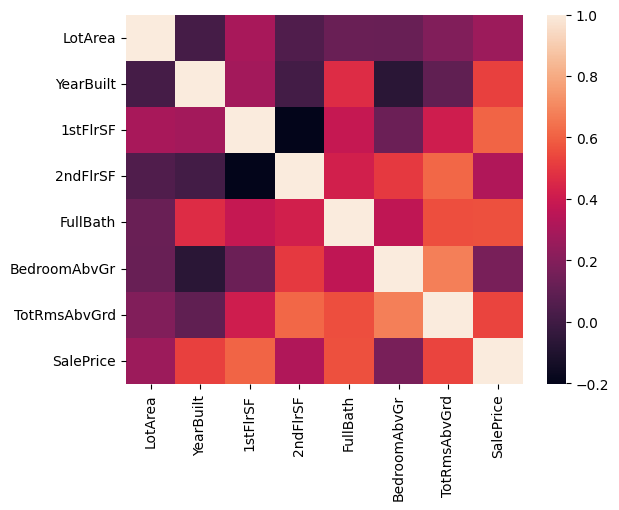

In [14]:
# See how different features correlate to sales price
# HouseStyle
corr = df[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']].corr()
sns.heatmap(corr)

In [11]:
# Determine number of missing values
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

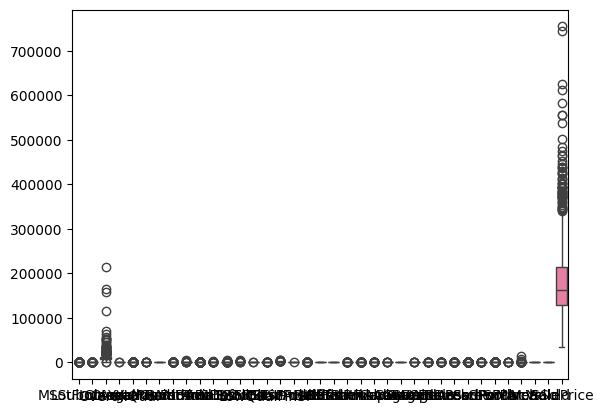

In [12]:
# View the data as a boxplot
sns.boxplot(df.select_dtypes(include='number'))
plt.show()